

# **Using Deep Learning to Classify Bee Species: An In-Depth Guide** 🐝

Bees play a pivotal role in maintaining our ecosystem. Yet, their diversity can be a challenge for even the most avid enthusiasts to discern. With over 20,000 recognized species (99 species in Ireland), how can we harness the power of deep learning to identify them from images? In this blog post, we'll embark on a journey from collecting bee images to deploying a classifier in the wild. Let's dive in!

## **Challenges in Bee Identification**

Did you know that distinguishing between different bee species, especially those closely related, can be quite challenging? The key to telling these species apart often lies in minute anatomical details. Take a look at the hind tibia (leg) for instance:

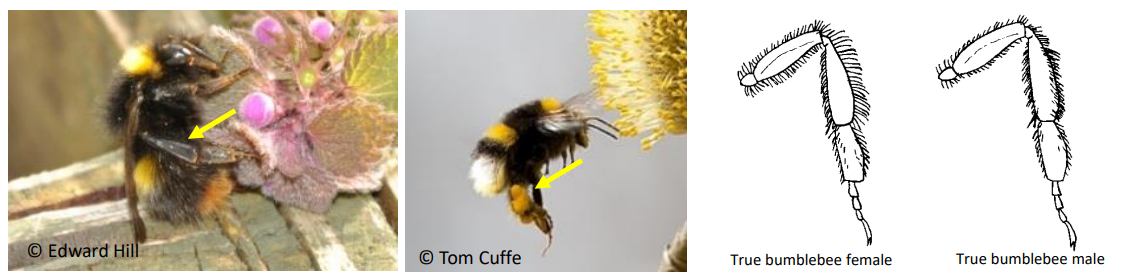

For the untrained eye, spotting such subtle differences from a distance is nearly impossible. While there are tools and guides that can assist in identification, for this project, we'll explore how machine learning can aid in this endeavor. For those keen on traditional methods, this [guide](https://pollinators.ie/wp-content/uploads/2023/04/Crash-course-in-bumblebee-identification_2023.pdf) offers a deep dive into bee identification.

## **Data Collection: Building the Bee Database**

Our dataset was sourced from [Biodiversity Ireland](https://species.biodiversityireland.ie/), which lists 99 known bee species in Ireland.

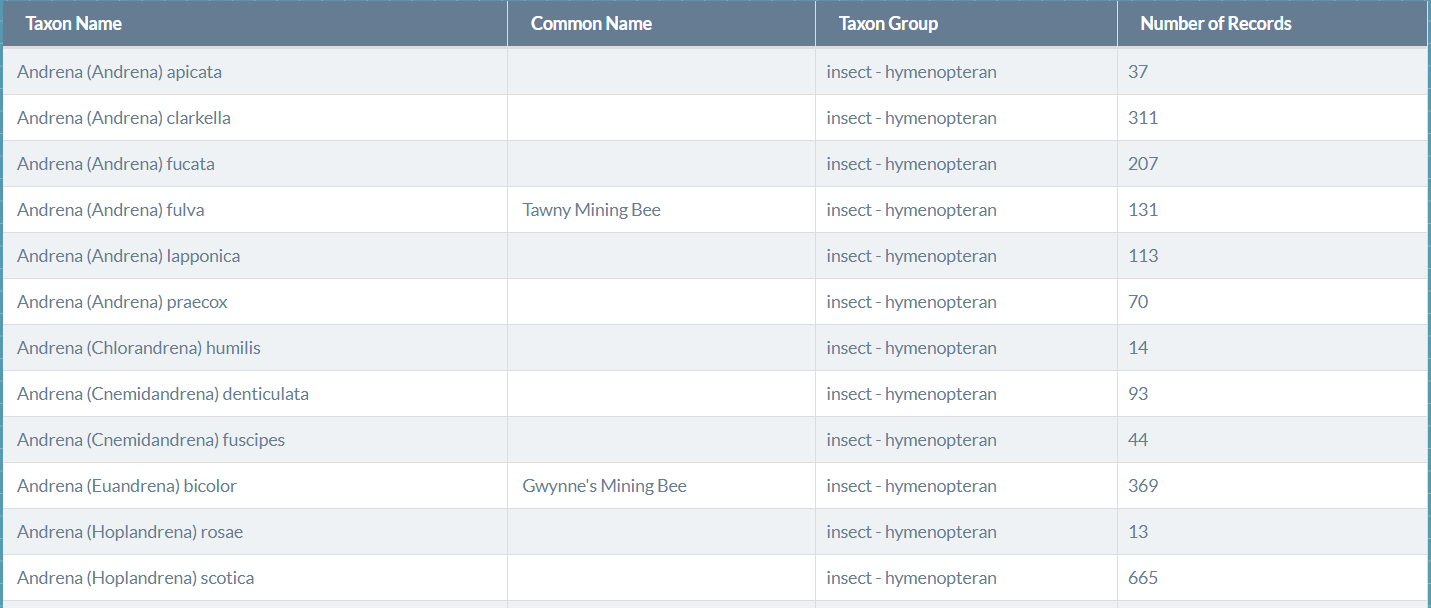

Each species listing provides scientific and common names. Moreover, images for these species can be downloaded via GBIF or EOL Profile. 

A noteworthy point: I manually navigated the site to gather image URLs instead of using automated tools like BeautifulSoup. This hands-on approach had two advantages:
1. It enabled me to identify and rectify malfunctioning links, which arose due to variations in the scientific naming within the URLs.
2. In classes with fewer images, I observed some pictures showing bees in atypical settings, like test tubes. Avoiding such images ensures our model trains on relevant, real-world data.



---

## **Creating a List of Bee Classifications**

Before diving into data collection, it's essential to know which bee species we are targeting. Here's a list of the species we're focusing on:

```python
bees_list = [
    "Andrena (Andrena) apicata",
    "Andrena (Andrena) clarkella",
    "Andrena (Andrena) fucata",
    "Andrena (Andrena) fulva - Tawny Mining Bee",
    "Andrena (Andrena) lapponica",
    "Andrena (Andrena) praecox",
    "Andrena (Chlorandrena) humilis",
    "Andrena (Cnemidandrena) denticulata",
    "Andrena (Cnemidandrena) fuscipes",
    "Andrena (Euandrena) bicolor - Gwynne's Mining Bee",
    "Andrena (Hoplandrena) rosae",
    "Andrena (Hoplandrena) scotica",
    "Andrena (Hoplandrena) trimmerana - Trimmer's Mining Bee",
    "Andrena (Leucandrena) barbilabris",
    "Andrena (Margandrena) marginata",
    "Andrena (Melandrena) nigroaenea",
    "Andrena (Micrandrena) minutula",
    "Andrena (Micrandrena) semilaevis",
    "Andrena (Micrandrena) subopaca",
    "Andrena (Plastandrena) pilipes",
    "Andrena (Poliandrena) tarsata - Tormentil Mining Bee",
    "Andrena (Ptilandrena) angustior",
    "Andrena (Taeniandrena) wilkella",
    "Andrena (Trachandrena) haemorrhoa - Early Mining Bee",
    "Andrena cineraria (Linnaeus) - Grey Mining Bee",
    "Andrena coitana (Kirby)",
    "Andrena stragulata",
    "Anthidium (Anthidium) manicatum",
    "Bombus (Bombus) cryptarum",
    "Bombus (Bombus) lucorum",
    "Bombus (Bombus) magnus",
    "Bombus (Megabombus) hortorum - Small Garden Bumble Bee",
    "Bombus (Melanobombus) lapidarius - Large Red Tailed Bumble Bee",
    "Bombus (Psithyrus) barbutellus - Barbut's Cuckoo Bee",
    "Bombus (Psithyrus) bohemicus - Gipsy Cuckoo Bee",
    "Bombus (Psithyrus) campestris - Field Cuckoo Bee",
    "Bombus (Psithyrus) rupestris - Hill Cuckoo Bee",
    "Bombus (Psithyrus) sylvestris - Four Coloured Cuckoo Bee",
    "Bombus (Psithyrus) vestalis - Vestal Cuckoo Bee",
    "Bombus (Pyrobombus) hypnorum",
    "Bombus (Pyrobombus) jonellus - Heath Bumble Bee",
    "Bombus (Pyrobombus) monticola - Mountain Bumble Bee",
    "Bombus (Pyrobombus) pratorum - Early Bumble Bee",
    "Bombus (Subterraneobombus) distinguendus - Great Yellow Bumble Bee",
    "Bombus (Thoracombus) muscorum - Moss Carder bee",
    "Bombus (Thoracombus) pascuorum - Common Carder Bee",
    "Bombus (Thoracombus) ruderarius - Red-tailed Carder Bee",
    "Bombus (Thoracombus) sylvarum - Shrill Carder Bee",
    "Coelioxys (Coelioxys) elongata",
    "Coelioxys (Coelioxys) inermis",
    "Colletes (Colletes) daviesanus",
    "Colletes (Colletes) floralis - Northern Colletes",
    "Colletes (Colletes) hederae",
    "Colletes (Colletes) similis",
    "Colletes (Colletes) succinctus",
    "Halictus (Halictus) rubicundus",
    "Halictus (Seladonia) tumulorum",
    "Hylaeus (Hylaeus) communis - Common Yellow Face Bee",
    "Hylaeus (Prosopis) brevicornis",
    "Hylaeus (Prosopis) confusus",
    "Hylaeus (Spatulariella) hyalinatus",
    "Lasioglossum (Dialictus) cupromicans",
    "Lasioglossum (Dialictus) leucopus",
    "Lasioglossum (Dialictus) smeathmanellum",
    "Lasioglossum (Evylaeus) albipes",
    "Lasioglossum (Evylaeus) calceatum - Slender Mining Bee",
    "Lasioglossum (Evylaeus) fratellum",
    "Lasioglossum (Evylaeus) nitidiusculum - Neat Mining Bee",
    "Lasioglossum (Evylaeus) punctatissimum",
    "Lasioglossum (Evylaeus) rufitarse",
    "Lasioglossum (Evylaeus) villosulum - Shaggy Mining Bee",
    "Lasioglossum (Lasioglossum) lativentre",
    "Megachile (Delomegachile) willughbiella",
    "Megachile (Megachile) centuncularis",
    "Megachile (Megachile) ligniseca",
    "Megachile (Megachile) versicolor",
    "Megachile (Xanthosarus) maritima",
    "Nomada argentata",
    "Nomada fabriciana Fabricius - Nomad Bee",
    "Nomada flavoguttata",
    "Nomada goodeniana - Gooden's Nomad Bee",
    "Nomada leucophthalma",
    "Nomada marshamella - Marsham's Nomad Bee",
    "Nomada obtusifrons",
    "Nomada panzeri",
    "Nomada ruficornis",
    "Nomada rufipes",
    "Nomada sheppardana - Dark Nomad Bee",
    "Nomada striata",
    "Osmia (Helicosmia) aurulenta",
    "Osmia (Osmia) rufa - Red Mason Bee",
    "Sphecodes ephippius",
    "Sphecodes ferruginatus",
    "Sphecodes geoffrellus",
    "Sphecodes gibbus",
    "Sphecodes hyalinatus",
    "Sphecodes monilicornis",
    "Sphecodes pellucidus",
    "Xylocopa (Xylocopa) violacea - Violet Carpenter Bee"
]
```

This list, `bees_list`, contains the scientific names of various bee species. By defining our target species upfront, we ensure that our data collection process remains focused and streamlined.Here's how we can automate the process of downloading images from their respective URLs:

```python

import urllib.request
import pandas as pd
import csv
import re

def download_images_from_urls(url_path, image_path):
    """Download images from the provided URLs and save them to the specified path."""
    urls_df = pd.read_csv(url_path)
    for idx, link in enumerate(urls_df.values):
        file_name = f'image{idx}.jpg'
        full_image_path = f'{image_path}{file_name}'
        try: 
            urllib.request.urlretrieve(link[0], full_image_path)
            print(f'{file_name} saved.')
        except:
            print(f"Failed to save {file_name}")
            continue

# Main loop for processing each bee species
for bee_name in bees_list:
    # Extract URLs from the multimedia text file
    multimedia_file = fr"DUMMY_PATH\Bee_Images\{bee_name}\multimedia.txt"
    with open(multimedia_file, encoding="utf8") as file:
        urls_img = [re.findall('(https?://[^\s]+?\.jpg)', line) for line in file if re.findall('(https?://[^\s]+?\.jpg)', line)]

    # Save the URLs to a CSV
    url_csv_path = fr"DUMMY_PATH\Test_Bee_Images\{bee_name}.csv"
    with open(url_csv_path, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(urls_img)

    # Define the path where you want to save the images
    images_save_path = fr"DUMMY_PATH\Dataset_Bees\{bee_name}\data\\"
    
    # Download the images using the URLs
    download_images_from_urls(url_csv_path, images_save_path)


```

In the code above, replace `DUMMY_PATH` with the actual base directory path where you wish to perform these operations. This function takes a CSV file path containing image URLs and a path where the images should be saved. It then iterates over each URL, downloads the image, and saves it to the specified path.

The main loop processes each bee species. For each species:

- It extracts image URLs from a multimedia.txt file associated with the bee species.
- These URLs are then saved to a CSV file.
- The images are downloaded from these URLs using the download_images_from_urls function and saved to a designated directory.

---

## **Prepare Dataset for Training**

Training a model requires a structured dataset, and the fastai library provides tools to streamline this process. Here's how we prepared our dataset for training:

### **Setting the Base Path**

The `Path.BASE_PATH` is set to ensure that all paths are displayed relative to a specific directory, making it easier to understand and navigate:

```python
Path.BASE_PATH = path
```

We have data pertaining to 99 bee species. Let's take a look at a few of them:

```python
path.ls(n_max=None)
```
```
(#99) [Path('Andrena (Andrena) apicata'),Path('Andrena (Andrena) clarkella'),...]
```

The `get_image_files(path)` function allows us to recursively retrieve all the image files from our specified directory, ensuring we have all our data points:

```python
fns = get_image_files(path)
```

### **Creating a Data Pipeline with DataBlock**

Fastai's `DataBlock` API provides a high-level abstraction to define the steps necessary for loading, splitting, and transforming a dataset:

```python
bees = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))
    
dls = bees.dataloaders(path)
```

To understand the structure and flow of this data processing pipeline, we can use:

```python
bees.summary(path)
```

### **Data Augmentation**

Data augmentation artificially increases the size of the training dataset by creating modified versions of images in the dataset. This helps in making the model more robust and generalizable:

```python
bees = bees.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bees.dataloaders(path)
```

We can visualize some of the augmented images:

```python
dls.train.show_batch(max_n=4, nrows=1, unique=True) # figsize=(30,30)
```
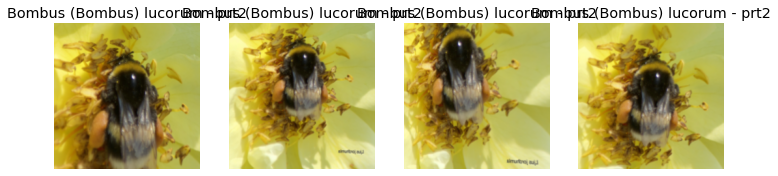


---


## **Training Process Using Fastai**

Training a deep learning model is a multi-step process. Here's how we approached it using the fastai library:

### **Setting Up the Environment**

Fastai provides a streamlined setup for deep learning projects. The following code sets up the required environment and imports necessary modules:

```python
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path
```

### **Basic Training**

For our initial training, we utilized the ResNet-18 architecture, which is a relatively lightweight model but performs exceptionally well for various vision tasks:

```python
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)
```

The model was trained for three epochs, and here's a summary of its performance:

| epoch | train_loss | valid_loss | error_rate | time     |
|-------|------------|------------|------------|----------|
| 0     | 1.480083   | 1.318795   | 0.360347   | 2:44:32  |
| 0     | 0.923098   | 0.842963   | 0.238649   | 2:47:05  |
| 1     | 0.727613   | 0.642357   | 0.182362   | 2:45:23  |
| 2     | 0.606020   | 0.566509   | 0.160040   | 2:44:23  |


These values indicate that the model's performance improved with each epoch. By the third epoch, the model achieved an accuracy of 84%, which suggests it has learned to identify a significant portion of the bee species correctly.

After basic training, we saved our model for future reference:

```python
learn.export('bee_init.pkl')
```

--------

### **Advanced Techniques**

#### **Using Callbacks**

[Callbacks](https://pouannes.github.io/blog/callbacks-fastai/) in fastai provide an avenue to incorporate custom behaviors into the training process. Callbacks like `SaveModelCallback`, `ReduceLROnPlateau`, `ShowGraphCallback`, and `EarlyStoppingCallback` offer enhanced control over the training process. They enable functionalities like saving the best model, adjusting the learning rate dynamically, and early stopping to prevent overfitting. More examples of using Callbacks can be found [here](https://github.com/PacktPublishing/Deep-Learning-with-fastai-Cookbook/blob/main/ch8/training_with_tabular_datasets_callbacks.ipynb).

#### **Implementing the Learning Rate Finder**

Choosing an appropriate learning rate is crucial. Fastai's Learning Rate Finder aids in this selection:

```python
lr_min, lr_steep = learn.lr_find()
print(f"minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")
```

The visual plot generated helps in choosing a learning rate just before the loss starts to rise.

#### **Advanced Training with Callbacks**

We further trained our model using a combination of callbacks to enhance performance:

```python
learn_es_sm = cnn_learner(dls, resnet18, metrics=error_rate)
keep_path = learn_es_sm.path
learn_es_sm.path = Path(path)
learn_es_sm.fit_one_cycle(10, cbs=[EarlyStoppingCallback(monitor='error_rate', patience=2), SaveModelCallback(monitor='error_rate', min_delta=0.01), ShowGraphCallback()])
learn_es_sm.path = keep_path
```

During this phase, the model's performance was tracked, and the best model was saved based on the lowest error rate achieved.

Finally, after advanced training, we exported our enhanced model:

```python
learn_es_sm.export('bee_advanced.pkl')
```


A piece of good advice from Jeremy Howard, is to run a basic training loop as a means to clean the dataset. Fastai provides a handy tool called `ImageClassifierCleaner()` to visually review the predictions of our model. It's especially useful for identifying images that might be mislabeled or don't belong in our dataset.

To use the cleaner:

```python
cleaner = ImageClassifierCleaner(learn)
cleaner
```

This tool presents a GUI where you can see the top losses (images where the model's predictions were most incorrect). 


For each image, you can either:
- Delete the image from the dataset if it's irrelevant.
- Relabel the image if it's misclassified.


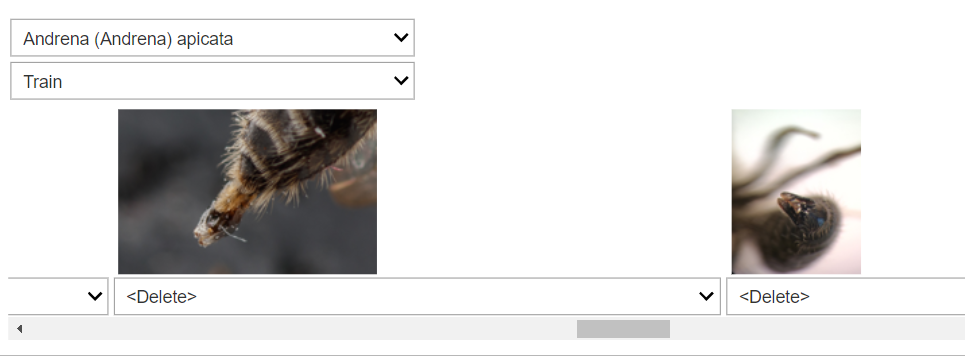

---


## **Deploying the Bee Classifier as a Web App with Streamlit**

Once our model is trained, it's time to put it to use! One of the most user-friendly ways to showcase our bee classifier is through a web application. Using Streamlit, we can quickly create an interactive app where users upload bee images, and the app classifies the bee species in real-time.


```python
import json
import platform
import pathlib
import streamlit as st
from fastai.vision.all import *
from fastai.vision.widgets import *
from streamlit_lottie import st_lottie

# Fix for 'WindowsPath' error on non-Windows systems
plt = platform.system()
if plt == 'Linux':
    pathlib.WindowsPath = pathlib.PosixPath

# Customise App UI
st.set_page_config(
    page_title="Bee Classifier",
    page_icon="🐝",
    initial_sidebar_state="expanded",
    menu_items={
        'About': "# This is a personal project to identify bee species."
    }
)

# Header
st.markdown("<h1 style='text-align: center;'>Welcome, I am your personal Bee species classifier.</h1>", unsafe_allow_html=True)

# Lottie Animation
def load_lottiefile(filepath: str):
    with open(filepath, "r") as f:
        return json.load(f)

lottie_coding = load_lottiefile("images/bee-flying.json")
col1, col2, col3 = st.columns(3)
with col2:
    st_lottie(
        lottie_coding,
        speed=1,
        reverse=False,
        loop=True,
        quality="medium",
        key=None,
    )

# Load the Model
@st.cache(allow_output_mutation=True)
def load_model():
    return load_learner("bee_init.pkl")

with st.spinner("I am collecting my thoughts..."):
    model = load_model()

# Image Upload
uploaded_image = st.file_uploader(
    "Upload your image and I'll give it a try.", type=["png", "jpg"])

# Predict and Display Results
if uploaded_image is not None:
    st.image(uploaded_image)
    try:
        pred, pred_idx, probs = model.predict(uploaded_image.getvalue())
        st.success(f"{[pred]} I am {probs[pred_idx]*100:.0f}% confident.")
        st.caption("Caution: I have only been trained on a small set of images. I may also be wrong.")
    except:
        st.write("Sorry, I don't know that bee")
```

This code sets up a basic Streamlit app. Users can upload their bee images, and our trained model predicts the bee species on the fly.

To run this app locally, use the command:

```bash
streamlit run your_script_name.py
```
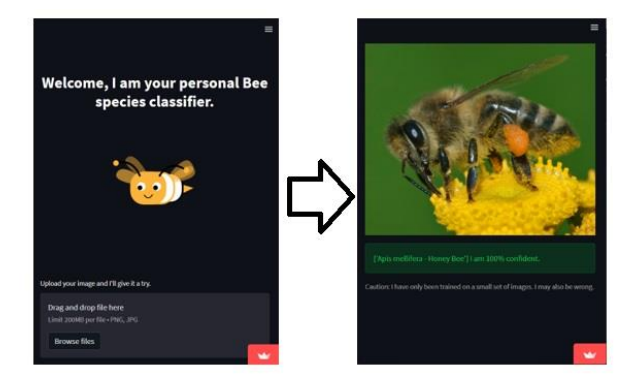

For those keen on making their app accessible to a wider audience, Streamlit also provides easy deployment options. Check out the final version of our bee classifier app [here](https://c123ian-bee-app-app-evtngf.streamlitapp.com/).

---


## **Wrapping Up: The Power of Deep Learning in Species Identification**

We've journeyed through the intricate process of classifying bee species using deep learning, covering everything from the initial data collection to deploying a real-world application. This endeavor underscores the immense potential of machine learning in revolutionizing traditional tasks, such as species identification.

However, it's essential to remember that in practice, species identification often hinges not just on visual observations but also on other contextual information like habitat, substrate, location, and time. Incorporating such multi-modal data could be an exciting avenue for future projects.

For those intrigued by the possibilities of deep learning in ecology, a [Kaggle competition](https://huggingface.co/spaces/competitions/FungiCLEF2023) on fungi identification using image metadata provides further insights.

Finally, for enthusiasts and developers alike, the complete code for this project is available on [GitHub](https://github.com/c123ian/Bee_app), and the dataset can be accessed on the [Huggingface Hub](#).

Thank you for joining us on this exploration. Deep learning continues to open new frontiers in various domains, and with tools like fastai and Streamlit, the barrier to entry is lower than ever. Whether you're a budding data scientist or an ecology enthusiast, there's no better time to dive in and make a difference.

**Happy coding, and keep buzzing!** 🐝
